In [22]:
import importlib as imp
import gridenvironment as ge
import qtable as qt 

imp.reload(ge)
imp.reload(qt)

<module 'qtable' from '/Users/hanqingqi/Desktop/RL/qtable.py'>

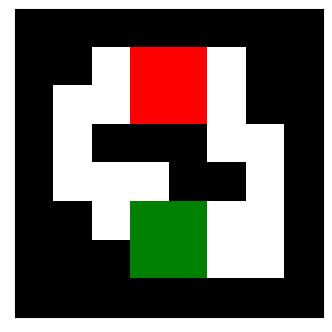

In [23]:
# Reinforcement learning parameters
α = 0.4  # Learning rate
γ = 1.0  # Discount factor
ε = 0.3  # Exploration rate
NUM_EPISODES = 10000000  # Total number of episodes
ACTIONS = {
    "0": (0, 1),  # Move right
    "1": (1, 0),  # Move down
    "2": (0, -1),  # Move left
    "3": (-1, 0),  # Move up
    "4": (0, 0)  # Stay
}

env = ge.GridEnvironment(map_name='map2')
env.render()
Q = qt.QTable(env.map_size, len(ACTIONS), env.num_agents)


In [24]:
from tqdm import tqdm

for episode in tqdm(range(NUM_EPISODES)):
    current_state_x = env.reset()
    current_action_x = env.choose_action(current_state_x, Q.table, ε)
    while True:
        # print(current_state_x, current_action_x)
        next_state_x, reward, done = env.step(current_action_x, ACTIONS)
        next_action_x = env.choose_action(next_state_x, Q.table, ε)
        # print(next_state_x, next_action_x)
        Q.update(current_state_x, current_action_x, reward, next_state_x, next_action_x, α, γ)
        # print(current_action_x, next_action_x)
        current_state_x, current_action_x = next_state_x, next_action_x
        if done:
            if reward >= 0:
                print("Episode {} finished successfully".format(episode))
                import time
                time.sleep(1)
            break

100%|██████████| 10000000/10000000 [03:20<00:00, 49907.89it/s]


In [25]:
print(Q.table[11455732])
print(Q.table[11455732].argmax())
print(current_state_x)
import numpy as np
max_action_x = np.base_repr(Q.table[11455732].argmax(), base=5, padding=0)
print(max_action_x)

[-1.451891  -1.0999999 -1.6218858 -1.0999999 -1.0999999 -1.0999999
 -2.1       -1.0999999 -2.1       -1.0999999 -1.0999999 -2.1
 -1.0999999 -2.1       -1.0999999 -1.1745294 -1.0999999 -1.1691154
 -1.0999999 -1.1300195 -1.2806878 -1.0999999 -1.0999999 -1.0999999
 -1.1400977 -1.0999999 -2.1       -1.0999999 -2.1       -1.24
 -1.0999999 -2.1       -1.0999999 -2.1       -1.344     -1.0999999
 -2.1       -1.0999999 -2.1       -1.344     -1.1159188 -1.0999999
 -2.0408397 -1.0999999 -1.0999999 -1.1206465 -1.0999999 -1.0999999
 -1.0999999 -1.0999999 -1.4189856 -1.0999999 -1.1300368 -1.0999999
 -1.0999999 -1.0999999 -2.1       -1.0999999 -2.1       -1.0999999
 -1.0999999 -2.1       -1.0999999 -2.1       -1.0999999 -1.0999999
 -2.1       -1.0999999 -2.1       -1.0999999 -1.3160309 -1.0999999
 -1.0999999 -1.0999999 -1.167151  -1.0999999 -2.1       -1.0999999
 -2.1       -1.344     -2.1       -3.1       -2.1       -3.1
 -1.344     -2.1       -3.1       -2.1       -3.1       -1.344
 -1.0999999 -2.1

In [28]:
env.show_result(Q.table, ACTIONS)

53546364
54556474
55566575
56576676
57586777


ValueError: invalid literal for int() with base 8: '57586777'